In [8]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
def unzip_data(path_in, path_out):
    if not os.path.exists(path_out):
        os.makedirs(path_out)

    with zipfile.ZipFile(path_in, 'r') as zip_ref:
        zip_ref.extractall(path_out)

    print(f"File {path_in} is unpacked to {path_out}")


In [ ]:
zip_file_path = '../src/data.zip'
extract_path = './extracted_data'
unzip_data(zip_file_path, extract_path)

In [9]:
df = pd.read_csv('extracted_data\list_attr_celeba.csv')
df.head()
df = df[['image_id', 'Bald']]
df.head()

,image_id,Bald
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


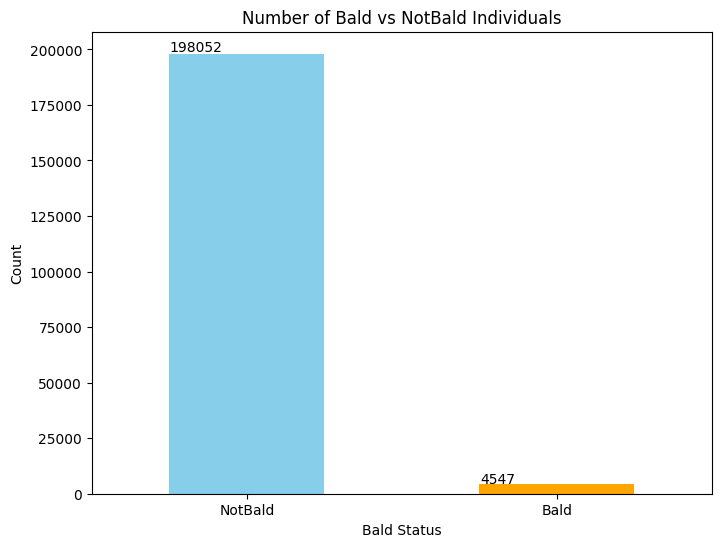

In [10]:
bald_counts = df['Bald'].value_counts()

bald_counts.index = bald_counts.index.map({1: 'Bald', -1: 'NotBald'})

plt.figure(figsize=(8, 6))
ax = bald_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Number of Bald vs NotBald Individuals')
plt.xlabel('Bald Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()